# Getting Started 

In [87]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)})
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.simplefilter('ignore')

What does a typical file look like?

In [88]:
print("\n".join(open('data/measured_real_power.csv').read().split("\n")[:10])) #!head for windows

# file...... measured_real_power.csv
# date...... Tue Aug 11 13:56:33 2015
# user...... mlunacek
# host...... (null)
# group..... class=house
# property.. measured_real_power
# limit..... 0
# interval.. 60
# timestamp,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
2013-07-01 00:00:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677


Read with pandas into a **DataFrame**

In [89]:
import pandas as pd

filename = 'data/measured_real_power.csv'
df = pd.read_csv(filename, skiprows=8)

What's this look like?

In [90]:
df.shape

(12961, 21)

In [91]:
df.head()

,# timestamp,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,...,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
0,2013-07-01 00:00:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
1,2013-07-01 00:01:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2,2013-07-01 00:02:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
3,2013-07-01 00:03:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
4,2013-07-01 00:04:00 UTC,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,...,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


Clean this up a bit..

**rename columns**

In [92]:
df.rename(columns={'# timestamp': 'timestamp'}, inplace=True)
df.columns

Index(['timestamp', 'triplex_meter_0', 'triplex_meter_1', 'triplex_meter_2',
       'triplex_meter_3', 'triplex_meter_4', 'triplex_meter_5',
       'triplex_meter_6', 'triplex_meter_7', 'triplex_meter_8',
       'triplex_meter_9', 'triplex_meter_10', 'triplex_meter_11',
       'triplex_meter_12', 'triplex_meter_13', 'triplex_meter_14',
       'triplex_meter_15', 'triplex_meter_16', 'triplex_meter_17',
       'triplex_meter_18', 'triplex_meter_19'],
      dtype='object')

Convert to `datetime`.

In [93]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Set the index

In [94]:
df.set_index('timestamp', inplace=True)
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00+00:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


Create a read function

In [95]:
%%writefile utils.py

import pandas as pd

def read_csv(filename):
    """ Simple read function for GridLABD files """
    df = pd.read_csv(filename, skiprows=8)
    df.rename(columns={'# timestamp': 'timestamp'}, inplace=True)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    return df


Overwriting utils.py


In [96]:
import utils

df = utils.read_csv('data/measured_real_power.csv')
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00+00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00+00:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


## Questions 

What does the raw data look like?

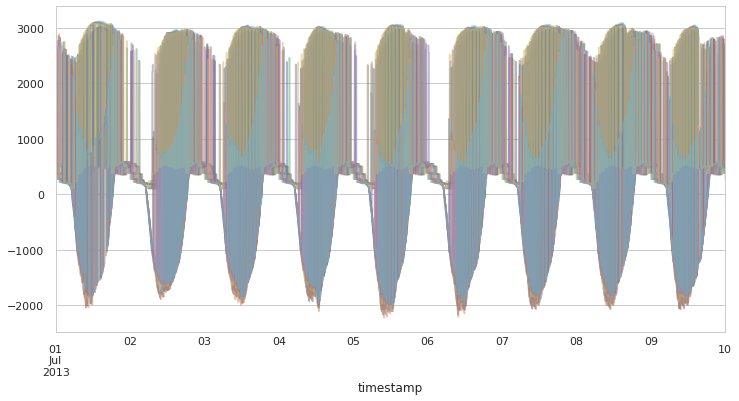

In [97]:
ax = df.plot(legend=False, alpha=0.5)

In [98]:
df.columns

Index(['triplex_meter_0', 'triplex_meter_1', 'triplex_meter_2',
       'triplex_meter_3', 'triplex_meter_4', 'triplex_meter_5',
       'triplex_meter_6', 'triplex_meter_7', 'triplex_meter_8',
       'triplex_meter_9', 'triplex_meter_10', 'triplex_meter_11',
       'triplex_meter_12', 'triplex_meter_13', 'triplex_meter_14',
       'triplex_meter_15', 'triplex_meter_16', 'triplex_meter_17',
       'triplex_meter_18', 'triplex_meter_19'],
      dtype='object')

Let's plot a single..

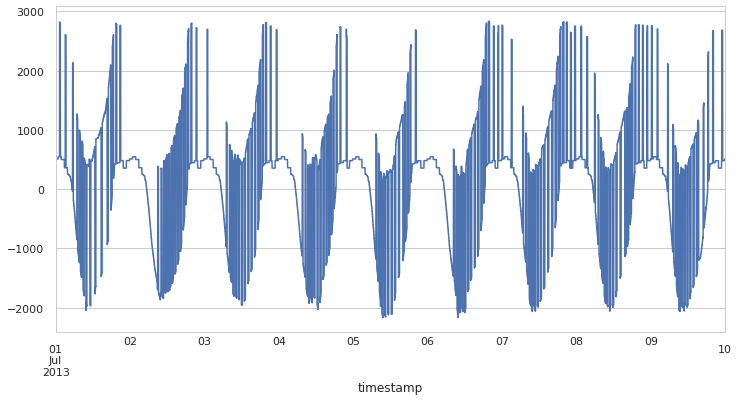

In [100]:
ax = df["triplex_meter_0"].plot(legend=False)

What's the average house power over time?

In [103]:
df.mean(axis=1).head()

timestamp
2013-07-01 00:00:00+00:00    491.2508
2013-07-01 00:01:00+00:00    491.2508
2013-07-01 00:02:00+00:00    491.2508
2013-07-01 00:03:00+00:00    491.2508
2013-07-01 00:04:00+00:00    483.8860
dtype: float64

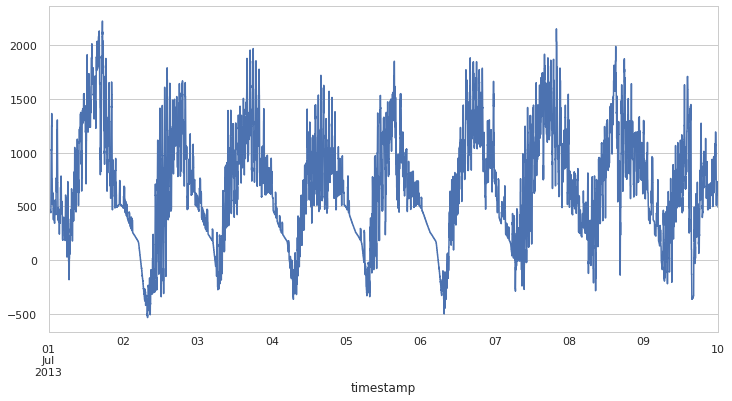

In [104]:
ax = df.mean(axis=1).plot()

**Rolling mean** (not that useful for this data)

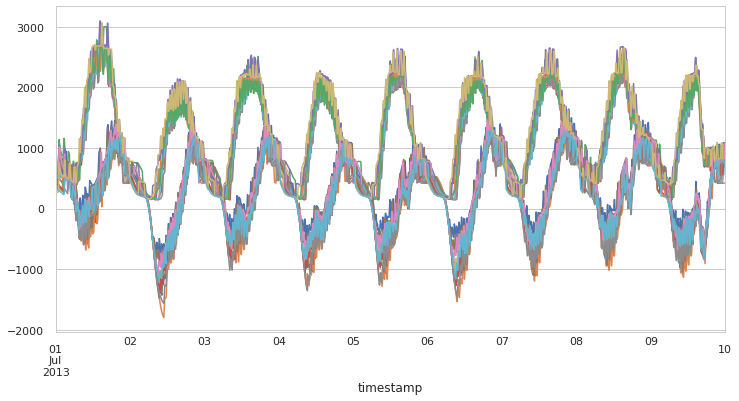

In [129]:
df.rolling("120min").mean().plot(legend=False)

Which house has the highest average value?

In [130]:
md = df.mean(axis=0).sort_values(ascending=True)
md.tail()

triplex_meter_11    1150.707959
triplex_meter_4     1173.583409
triplex_meter_2     1225.211889
triplex_meter_18    1269.935302
triplex_meter_14    1302.686807
dtype: float64

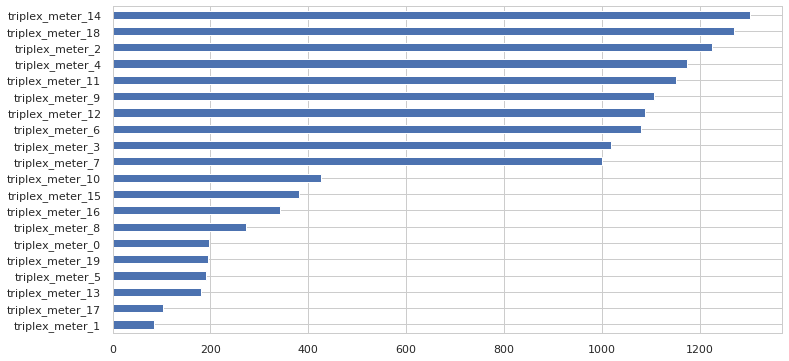

In [131]:
md.plot(kind='barh')

Box plot of `house_0`, `house_1`, `house_2`, and `house_3`.

In [132]:
tmp = df[['triplex_meter_0', 'triplex_meter_1', 'triplex_meter_2', 'triplex_meter_3']]
tmp.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3
timestamp,,,,
2013-07-01 00:00:00+00:00,510.912,510.912,510.912,547.924
2013-07-01 00:01:00+00:00,510.912,510.912,510.912,547.924
2013-07-01 00:02:00+00:00,510.912,510.912,510.912,547.924
2013-07-01 00:03:00+00:00,510.912,510.912,510.912,547.924
2013-07-01 00:04:00+00:00,510.911,510.911,510.911,547.922


**Boxplots**

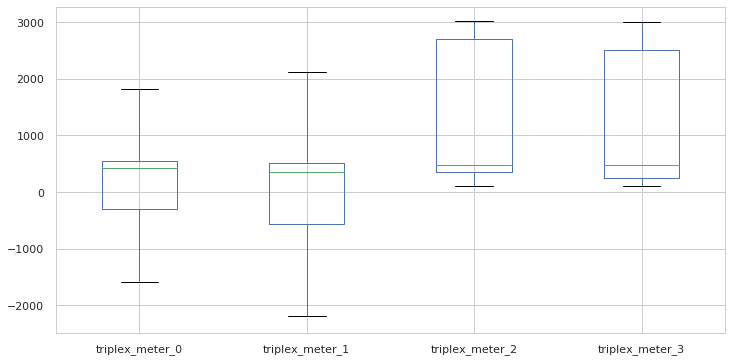

In [138]:
tmp.boxplot(return_type='axes')

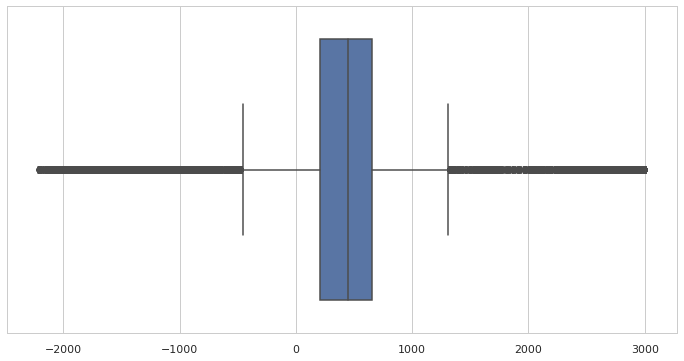

In [139]:
sns.boxplot(tmp)

We need to **melt**

In [140]:
tmp.melt().head()

,variable,value
0,triplex_meter_0,510.912
1,triplex_meter_0,510.912
2,triplex_meter_0,510.912
3,triplex_meter_0,510.912
4,triplex_meter_0,510.911


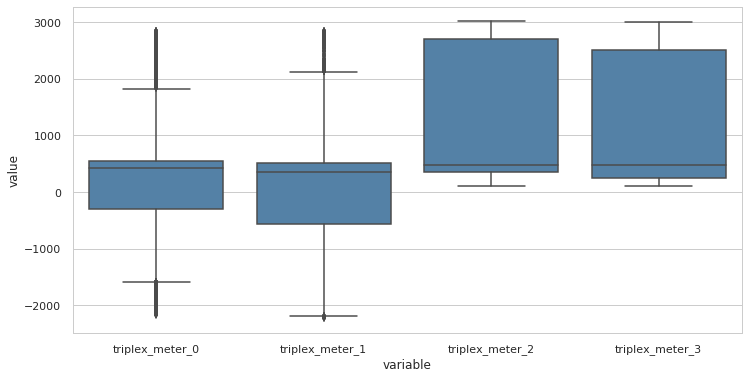

In [141]:
sns.boxplot(data=tmp.melt(), y='value', x='variable', color='steelblue')

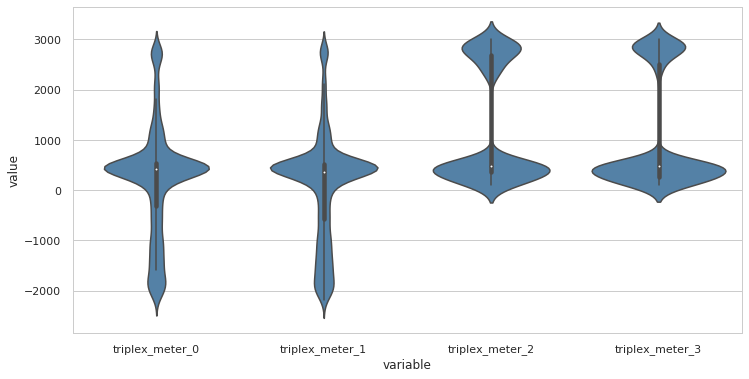

In [142]:
sns.violinplot(data=tmp.melt(), y='value', x='variable', color='steelblue')

Here's a little string formatting trick.

In [143]:
"word {}".format("hello")

'word hello'

In [144]:
[ "triplex_meter_{}".format(x) for x in range(5)]

['triplex_meter_0',
 'triplex_meter_1',
 'triplex_meter_2',
 'triplex_meter_3',
 'triplex_meter_4']

What is the average temperature of each house over time?

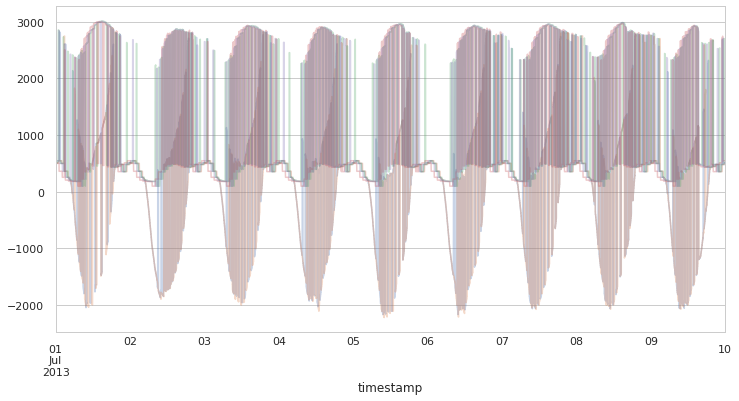

In [145]:
tmp = df[[ "triplex_meter_{}".format(x) for x in range(5)]]
_ = tmp.plot(legend=False, alpha=0.3)

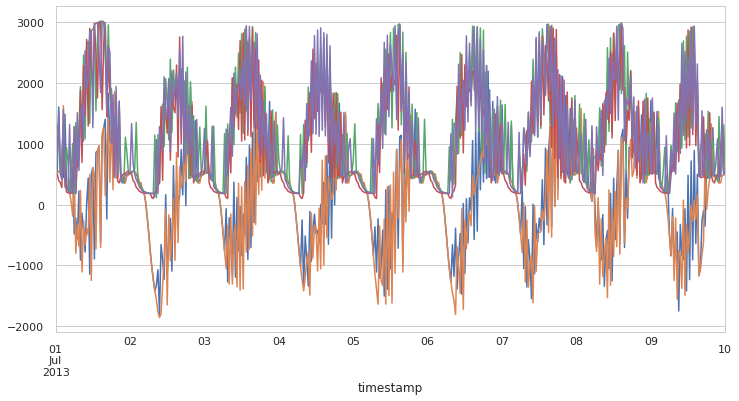

In [146]:
tmp.resample('30min').mean().plot(legend=False)

## Selection 

What does July 5th look like? 

In [148]:
df.index

DatetimeIndex(['2013-07-01 00:00:00+00:00', '2013-07-01 00:01:00+00:00',
               '2013-07-01 00:02:00+00:00', '2013-07-01 00:03:00+00:00',
               '2013-07-01 00:04:00+00:00', '2013-07-01 00:05:00+00:00',
               '2013-07-01 00:06:00+00:00', '2013-07-01 00:07:00+00:00',
               '2013-07-01 00:08:00+00:00', '2013-07-01 00:09:00+00:00',
               ...
               '2013-07-09 23:51:00+00:00', '2013-07-09 23:52:00+00:00',
               '2013-07-09 23:53:00+00:00', '2013-07-09 23:54:00+00:00',
               '2013-07-09 23:55:00+00:00', '2013-07-09 23:56:00+00:00',
               '2013-07-09 23:57:00+00:00', '2013-07-09 23:58:00+00:00',
               '2013-07-09 23:59:00+00:00', '2013-07-10 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=12961, freq=None)

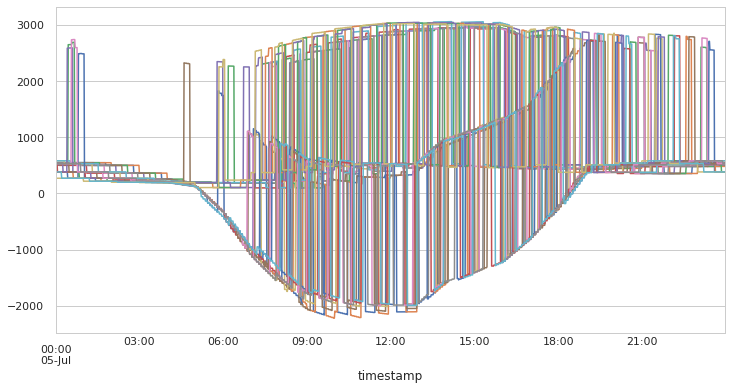

In [152]:
df['2013-07-05'].plot(legend=False)

In [153]:
df['triplex_meter_0'].head()

timestamp
2013-07-01 00:00:00+00:00    510.912
2013-07-01 00:01:00+00:00    510.912
2013-07-01 00:02:00+00:00    510.912
2013-07-01 00:03:00+00:00    510.912
2013-07-01 00:04:00+00:00    510.911
Name: triplex_meter_0, dtype: float64

Both index and columns?

In [155]:
df.loc['2013-07-05', ['triplex_meter_0', 'triplex_meter_1']].tail()

,triplex_meter_0,triplex_meter_1
timestamp,,
2013-07-05 23:55:00+00:00,510.919,482.327
2013-07-05 23:56:00+00:00,510.919,482.327
2013-07-05 23:57:00+00:00,510.916,482.324
2013-07-05 23:58:00+00:00,510.916,482.324
2013-07-05 23:59:00+00:00,510.916,482.324


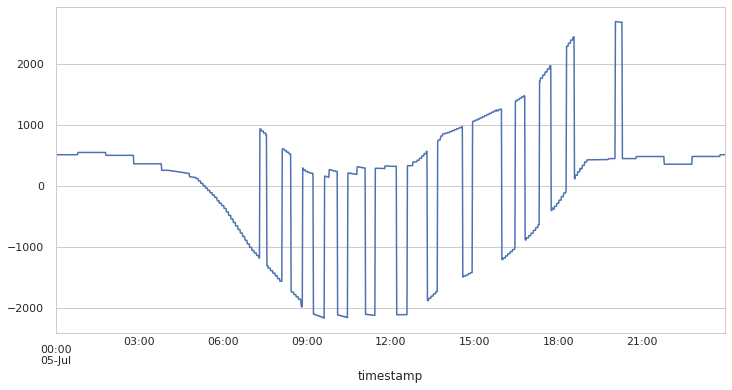

In [156]:
df.loc['2013-07-05', 'triplex_meter_0'].plot()